<a href="https://colab.research.google.com/github/farrahfox/Probability-Statistics/blob/main/Farrah_Fox_Final_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Notebook - Spring 2024

In [6]:
# Importing all the libraries

In [7]:
import matplotlib.pyplot as plt
import imageio
import torch
import torchvision
from torchvision import models, transforms
import numpy as np
from torchvision.models import *
from PIL import Image
import requests
from torchvision import models
from torchsummary import summary

In [8]:
# defines a function that is designed to display an image represented by the array in grayscale

1. 'def plot(x):': This line defines a function called 'plot' which takes a single argument 'x'.
2. 'fig, ax = plt.subplots()': This line creates a figure and an axis object using matplotlib's 'subplots()' function. The 'fig' variable refers to the entire figure, while 'ax' refers to the axis within that figure.
3. 'im = ax.imshow(x, cmap='gray')': This line displays the image represented by the array 'x' using the 'imshow()' function. The 'cmap='gray'' argument specifies that the colormap should be grayscale, meaning the image will be displayed in black and white.
4. 'ax.axis('off')': This line turns off the axis labels and ticks, making the image display without any axis markers.
5. fig.set_size_inches(20, 20): This line sets the size of the figure in inches. In this case, it's set to 20x20 inches.
6. plt.show(): This line displays the figure.

In [9]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x,cmap='gray')
    ax.axis('off')
    fig.set_size_inches(20, 20)
    plt.show()

In [10]:
# loads an image from the specified URL and assigns it to the variable

In [11]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')

<ipython-input-11-2086ec9e0cf6>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')


In [12]:
# displaying the variable above

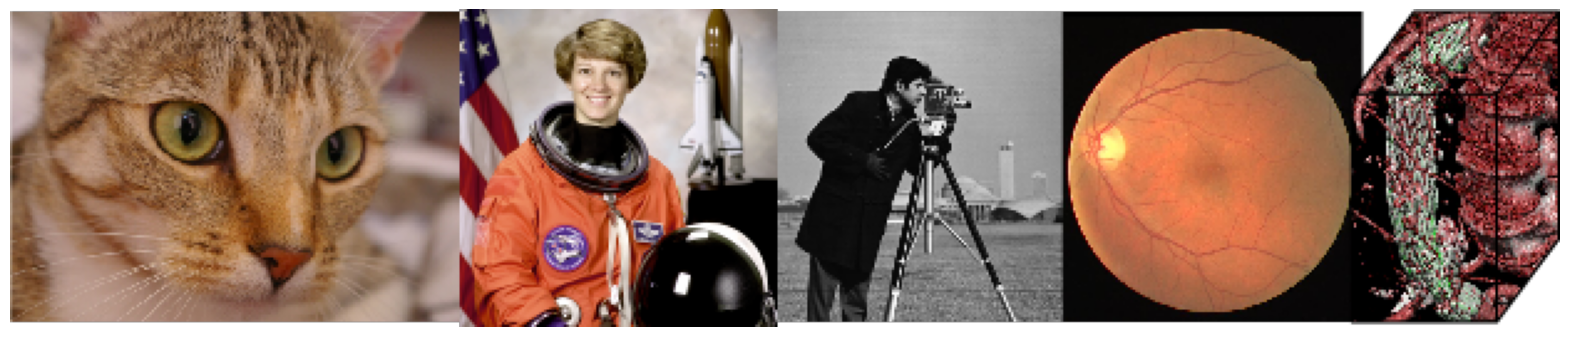

In [13]:
plot(im)

In [14]:
# loads a pretrained AlexNet model and moves it to the GPU for faster computation

In [15]:
net = alexnet(pretrained=True).cuda(0)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 156MB/s]


In [16]:
# subtracting the mean values and dividing by the standard deviation values
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
# resizes the image to 256x256 pixels, crops the center to 224x224 pixels,
# converts it to a PyTorch tensor, and then normalizes it using the provided mean and standard deviation values
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

In [17]:
# reads an image from the given URL and saves it to a variable 'im'

In [18]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')

<ipython-input-18-772805ffc2cf>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')


In [19]:
# displays image

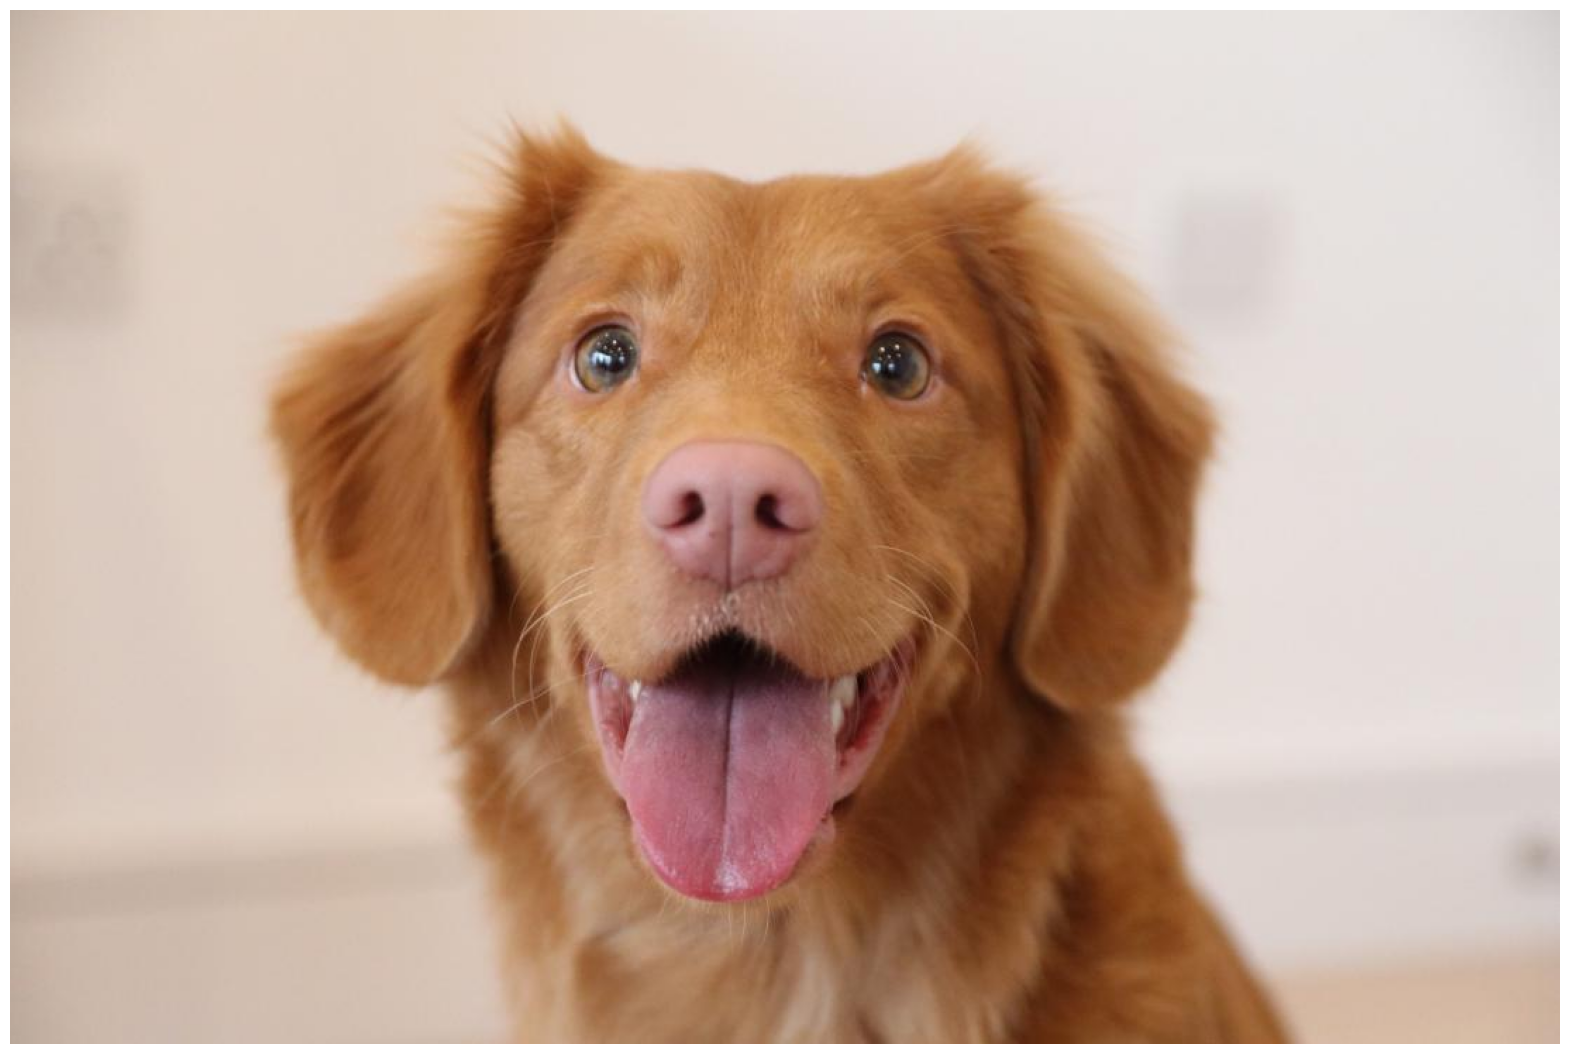

In [20]:
plot(im)

In [21]:
# converts a NumPy array representing an image ('im') into a format that can be manipulated and displayed using Python's imaging libraries

In [22]:
image = Image.fromarray(im) #convert to pil

In [23]:
# setting the result of a function that has its input as a variable equal to a different variable

In [24]:
img_tensor = preprocess(image)

In [25]:
# Adds an extra dimension (or axis) to a tensor
# The '(0)' specifies the dimension along which you want to add the extra dimension

In [26]:
img_tensor = img_tensor.unsqueeze_(0)

In [27]:
# Fetches the dimensions of the variable named before it

In [28]:
img_tensor.shape

torch.Size([1, 3, 224, 224])

In [29]:
# converting your image data into a PyTorch tensor and moving it to the GPU, making it ready for further processing

In [30]:
img_variable = torch.tensor(img_tensor).cuda(0)

<ipython-input-30-a3c4eb55103d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [31]:
# executing the neural network model ('net') on the input image ('img_variable') to generate some output ('out')

In [32]:
out = net(img_variable)

In [33]:
# finding the index of the class with the highest probability from the output tensor of a neural network, and assigning that index to 'label_index'

In [34]:
label_index = out.cpu().data.numpy().argmax()

In [35]:
# calling the variable

In [36]:
label_index

207

In [37]:
# sorting the output tensor, getting the indices of the top 10 elements, and reversing them so they're in descending order

In [38]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])

In [39]:
# assigns a URL to a variable

In [40]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

In [41]:
# converts the keys of a dictionary fetched from a URL to integers and assigns the values to those keys

In [42]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [43]:
# displaying 'labels' value for the element at the index 'labels_index'

In [44]:
print(labels[label_index])

golden retriever


In [45]:
# prints the corresponding values from the 'labels' list for the first 10 indices in 'top_list'

In [46]:
for i in range(10):
    print(labels[top_list[i]])

golden retriever
Brittany spaniel
Irish setter, red setter
Blenheim spaniel
Sussex spaniel
cocker spaniel, English cocker spaniel, cocker
tennis ball
Tibetan mastiff
Pekinese, Pekingese, Peke
clumber, clumber spaniel


In [47]:
# calling a variable

In [48]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [49]:
# shows the architecture summary of the neural network net, along with information about the input shape
      # the number of parameters, the output shape at each layer, and sometimes memory usage

In [50]:
summary(net, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [51]:
# taking an image input, passing it through the first layer of a neural network,
# moving the output from GPU to CPU, and converting it into a numpy array

In [52]:
out = net.features[0](img_variable).cpu().detach().numpy()

In [53]:
# visualizing a specific slice of a multidimensional array 'out'

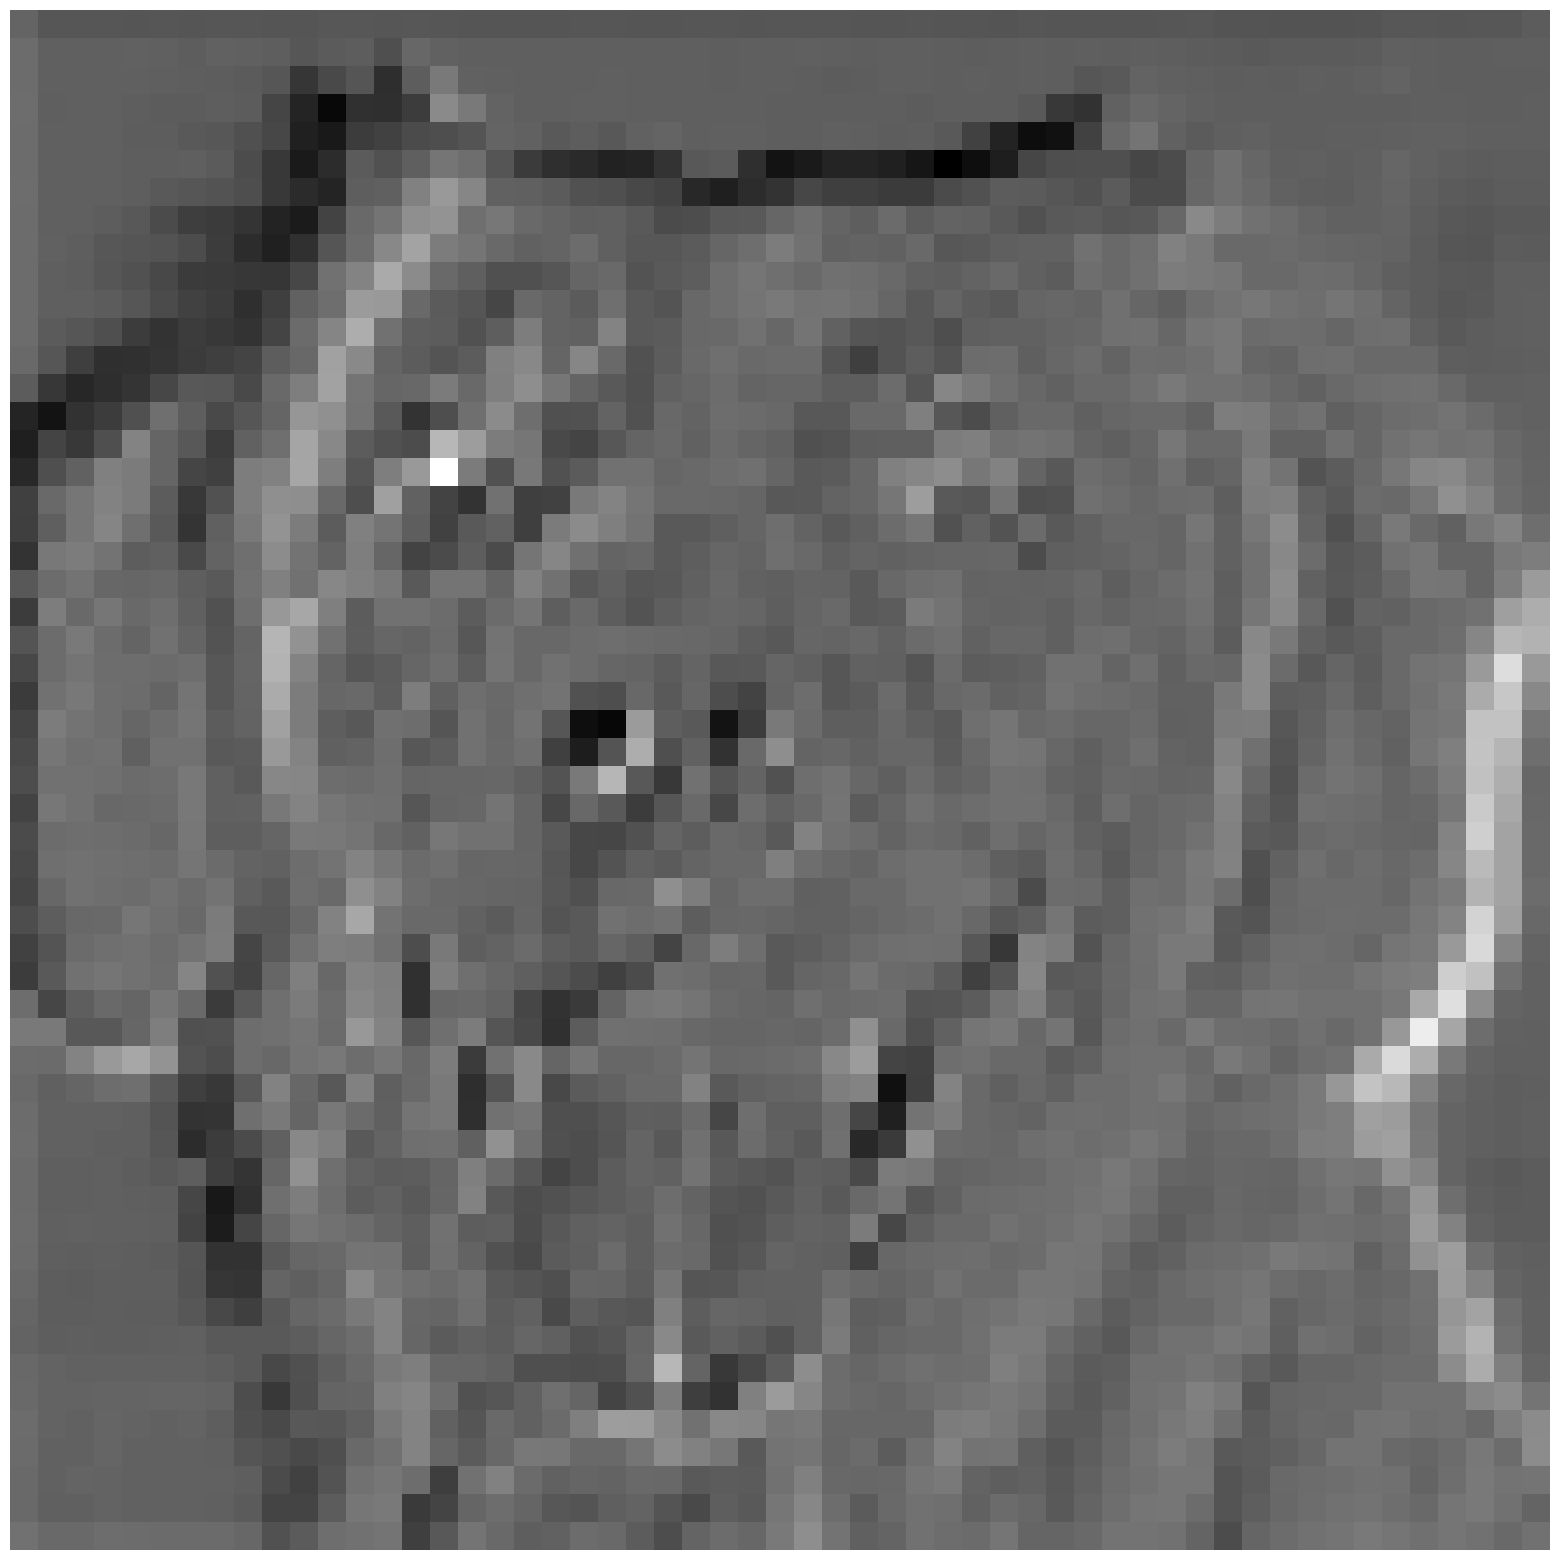

In [54]:
plot(out[0,0,:,:])

In [55]:
# visualizing the first 13 layers of the neural network model ('net') on an input image ('img_variable')

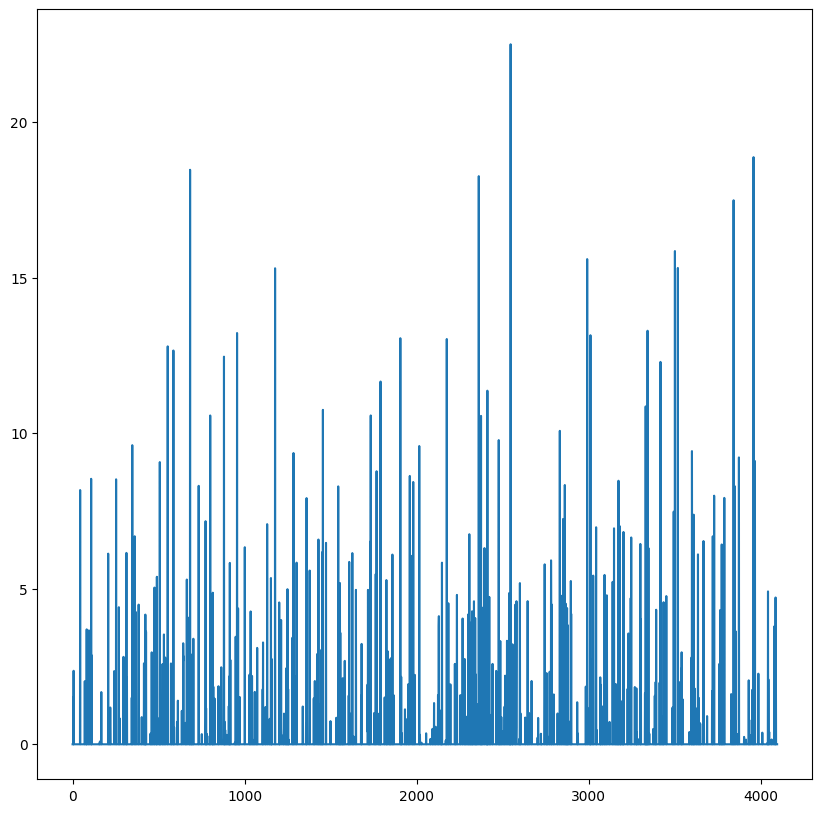

In [56]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [57]:
# retrieving an image from the URL and assigning it to the variable 'im'

In [58]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')

<ipython-input-58-db4016f420a5>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')


In [59]:
# displaying the variable 'im'

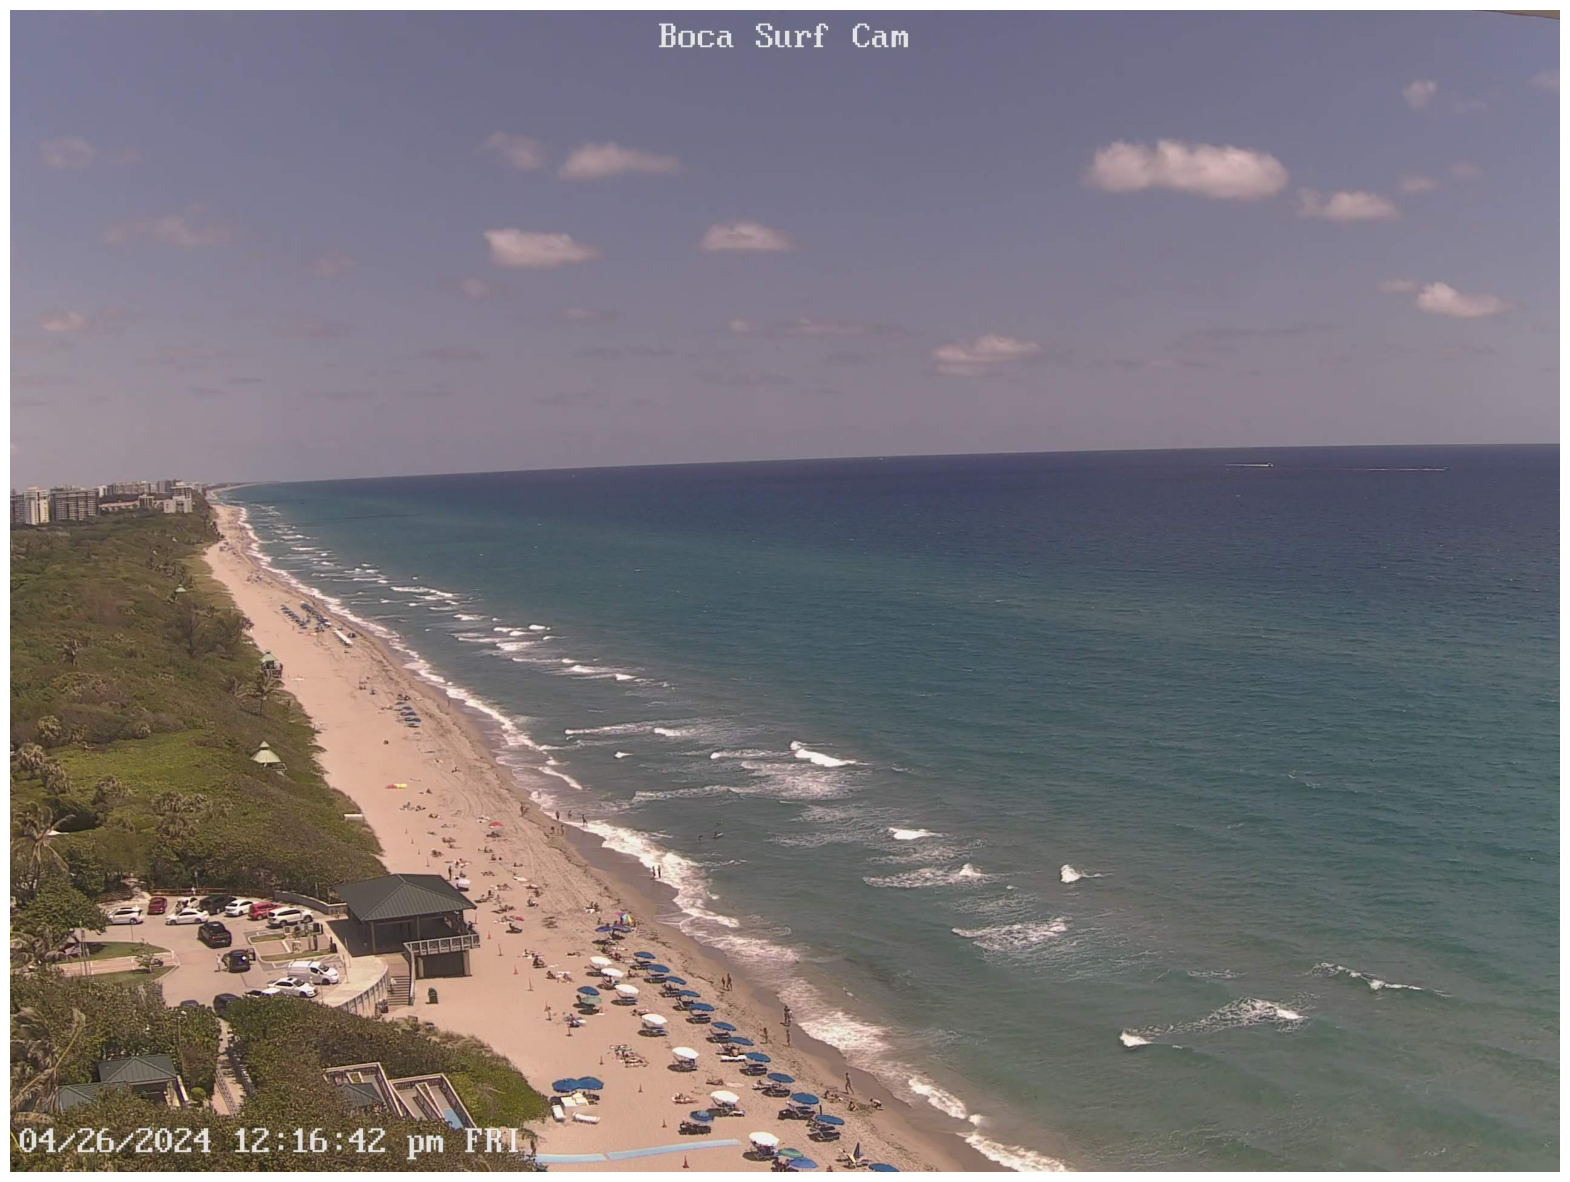

In [60]:
plot(im)

1.   Converts an image array to a PIL (Python Imaging Library) image: It takes an image represented as an array 'im' (usually a NumPy array) and converts it to a PIL image.
2. Preprocesses the image: It applies some preprocessing to the PIL image. The 'preprocess' function is assumed to be defined elsewhere in the code. This preprocessing typically includes steps like resizing, normalization, and formatting the image to be compatible with the neural network model being used.
1.  Converts the preprocessed image to a PyTorch tensor: After preprocessing, the PIL image is converted to a PyTorch tensor. PyTorch tensors are the primary data structure used for building neural networks in PyTorch.
2.  Reshapes the tensor: It unsqueezes the tensor by adding a dimension at index 0. This is often done to match the input shape expected by the neural network model. For example, many models expect a batch dimension, so unsqueezing at index 0 adds that batch dimension.
1.  Moves the tensor to GPU: If available, it moves the tensor to the GPU. Specifically, it moves the tensor to GPU device 0 ('cuda(0)'). This assumes that you have a GPU available and PyTorch is configured to use it.
2.   Returns the tensor: The function returns the tensor, which is now ready to be used as input for a neural network model.







In [61]:
# prepares images to be processed by a neural network model

In [62]:
def load_im(im):
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image)
    img_tensor = img_tensor.unsqueeze_(0)
    img_variable = torch.tensor(img_tensor).cuda(0)
    return img_variable

In [63]:
# loads an image, preprocesses it, passes it through a neural network, and stores the output in the variable 'out'

In [64]:
out = net(load_im(im))

<ipython-input-62-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


1.   'def inference(im):': This line defines a function called inference that takes an input 'im' which likely stands for an image.
2.   'out = net(load_im(im))': It seems like 'net' is a neural network model, and 'load_im' is a function to load the image and possibly preprocess it before feeding it into the network. So, this line runs the image through the neural network model.
1.   'label_index = out.cpu().data.numpy().argmax()': This line extracts the index of the label with the highest probability from the output of the neural network. It seems like 'out' is a tensor containing the output probabilities of the network.
2.   'top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])': This line sorts the output probabilities in descending order and extracts the indices of the top 10 highest probabilities. It then stores these indices in 'top_list'.
1.   'print(labels[label_index])': This line prints the label corresponding to the highest probability.
2.   'print('____')': This line prints a separator.
1.   'for i in range(10):': This line starts a loop iterating 10 times.
2.   'print(labels[top_list[i]])': Inside the loop, it prints the labels corresponding to the top 10 probabilities.









In [65]:
# load a pre-trained neural network model, pass an image through it, and print out the top predicted labels along with their probabilities

In [66]:
def inference(im):
    out = net(load_im(im))
    label_index = out.cpu().data.numpy().argmax()
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])
    print(labels[label_index])
    print('____')
    for i in range(10):
        print(labels[top_list[i]])

In [67]:
# performing some kind of inference or prediction on that image 'im'

In [68]:
inference(im)

promontory, headland, head, foreland
____
promontory, headland, head, foreland
seashore, coast, seacoast, sea-coast
sandbar, sand bar
breakwater, groin, groyne, mole, bulwark, seawall, jetty
lakeside, lakeshore
cliff, drop, drop-off
dam, dike, dyke
aircraft carrier, carrier, flattop, attack aircraft carrier
valley, vale
sturgeon


<ipython-input-62-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

In [69]:
# importing more libraries

In [70]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

1.   'requires_grad=True': This indicates that PyTorch should track operations on this tensor for the purpose of computing gradients.
2.   'dtype=torch.float': It sets the data type of the tensor to float. PyTorch tensors need to specify their data type, and 'torch.float' is a commonly used type for floating-point numbers.
1.   'device=torch.device('cuda')': This specifies that the tensor should be allocated on the GPU (Graphics Processing Unit) rather than on the CPU (Central Processing Unit). 'cuda' is a term used by PyTorch to refer to the GPU.






In [71]:
# converts the input data into a PyTorch tensor and sets it up for GPU processing with gradient tracking enabled

In [72]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

1.   'torch.tensor(data, ...)' - This creates a PyTorch tensor from the input 'data'. The 'data' argument can be a list, tuple, NumPy array, etc. PyTorch tensors are the fundamental data structure used in PyTorch for all computations.
2.   'requires_grad=False' - This specifies that gradients won't be calculated with respect to this tensor. This is useful when you're dealing with input data or parameters that you don't want to compute gradients for, such as input images.
1.   'dtype=torch.float' - This sets the data type of the tensor to float. This ensures that the tensor contains floating-point numbers.
2.   'device=torch.device('cuda')' - This assigns the tensor to be stored on the GPU, specifically using CUDA, which is the parallel computing platform and application programming interface model created by NVIDIA. This assumes that you have a GPU available and configured for CUDA computation. If you don't have a GPU or CUDA configured, this line will raise an error.






In [73]:
# takes some data, converts it into a PyTorch tensor, and moves it to the GPU if one is available

In [74]:
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

1.   'fig, ax = plt.subplots()': This line creates a new figure ('fig') and a set of subplots ('ax') in matplotlib. By default, it creates a single subplot.
2.   'im = ax.imshow(x, cmap='gray')': This line creates an image plot of the 2D array 'x' using the 'imshow()' function. The 'cmap='gray'' argument specifies that the colormap used for the plot will be grayscale, meaning the image will be displayed in shades of gray.
1.   'ax.axis('off')': This line turns off the axis labels and ticks for the plot. This is useful when you only want to display the image without any axis information.
2.   'fig.set_size_inches(5, 5)': This line sets the size of the figure to 5 inches by 5 inches. This is a square aspect ratio, which can be useful for displaying images.
1.   'plt.show()': This line displays the plot. In a Jupyter notebook or Google Colab environment, this will display the image below the cell where the code is executed.







In [75]:
# displays 'x' as a grayscale image with the axis turned off, in a square figure with dimensions 5 inches by 5 inches

In [76]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

1.   'url_head = "https://docs.google.com/presentation/d/"': This line initializes the base URL for Google Slides.
2.   'url_body = url.split('/')[5]': This line extracts the unique identifier of the Google Slides presentation. It splits the URL by '/', taking the 6th part (index 5) which is usually the presentation ID.
1.   'page_id = url.split('.')[-1]': This line extracts the page id from the URL. It splits the URL by '.', taking the last part of the split URL which should be the page id.
2.   'return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id': This line constructs the final URL. It appends the presentation ID ('url_body') and page id ('page_id') to the base URL along with the necessary parameters for exporting to PDF.






In [77]:
# takes a Google Slides URL as input and returns a modified URL that points to a PDF export of the specified slide

In [78]:
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

1.   'get_slides(url)': This function takes a URL as input, presumably the URL of a Google Slides presentation.
2.   'url = get_google_slide(url)': This line might be a call to another function, 'get_google_slide', which likely formats the given URL to ensure it's a link to a Google Slides presentation. It's common to have a function like this to handle different URL formats or validate the URL.
1.   'r = requests.get(url, allow_redirects=True)': This line sends a GET request to the provided URL using the 'requests' library, which is used for making HTTP requests in Python. The 'allow_redirects=True' parameter allows the request to follow redirects if the URL redirects to another location.
2.   'open('file.pdf', 'wb').write(r.content)': This line opens a file named 'file.pdf' in binary write mode ('wb') and writes the content of the response ('r.content') into it. This line essentially downloads the Google Slides presentation as a PDF file.
1.   'images = convert_from_path('file.pdf', 500)': This line converts each page of the downloaded PDF file into an image. It uses 'convert_from_path' function from a library like 'pdf2image'. The '500' parameter might represent the resolution at which the images are generated, in this case, 500 DPI (dots per inch).
2.   'return images': Finally, the function returns a list of image objects representing each slide of the Google Slides presentation.







In [79]:
# fetches images from a Google Slides presentation and returns them as a list of image objects

In [80]:
def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

1.   'load(image)': This function presumably takes an image as input.
2.   'apply_transforms(image)': This likely applies some preprocessing transformations to the input image. This could include resizing, normalization, or any other transformations required for the model.
1.   '.clone()': This creates a copy of the tensor. It's often used to avoid in-place modifications of tensors.
2.   '.detach()': This detaches the tensor from the computation graph. This is useful when you don't need gradients for certain operations, such as when you're doing inference.
1.   '.requires_grad_(True)': This sets the requires_grad attribute of the tensor to True. This means that gradients will be computed for this tensor during backpropagation, which is typically used for parameters of the model.
2.   '.to(device)': This moves the tensor to a specified device (e.g., CPU or GPU). The device variable should be defined somewhere earlier in the code, indicating whether the model should run on a GPU or CPU.







In [81]:
# loads an image, applies some transformations to preprocess it for the model, creates a copy of the preprocessed image tensor,
# detaches it from the computation graph, sets it to require gradients, and then moves it to the specified device

In [82]:
def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

In [83]:
# selects the appropriate device based on the availability of a GPU

In [84]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [85]:
# fetches a JSON file containing labels from a URL, converts the keys of the dictionary from strings to integers,
# and assigns the resulting dictionary to the variable 'labels'

In [86]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

In [87]:
# loads a pre-trained AlexNet model and sets it up for evaluation on a specified device

In [88]:
model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [89]:
# waning & waxing moon slides (my doing)

In [90]:
url = "https://docs.google.com/presentation/d/1bWlo5sP0xRUk-W8_y_7SwzYTFmswn3yDjELzJvbGJ28/edit#slide=id.g2b78f466108_0_250"

In [ ]:
# fetches slides from a URL, plots them (assuming you have defined a plot() function),
# loads them, appends them to a list, and then stacks them vertically into a single tensor using PyTorch

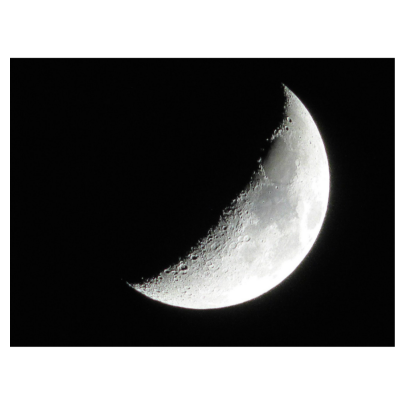

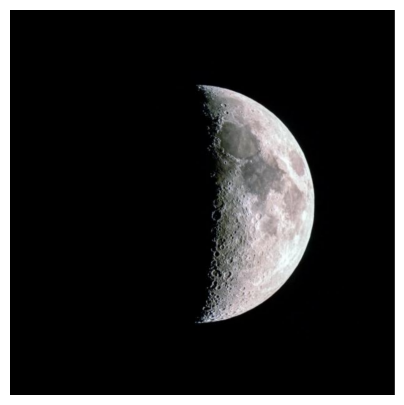

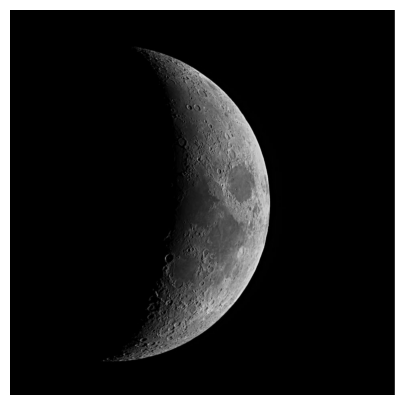

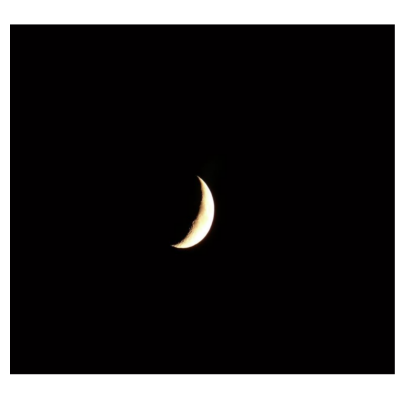

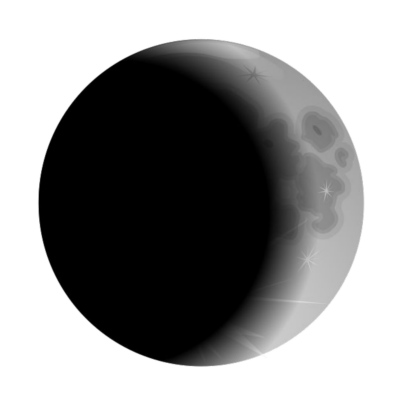

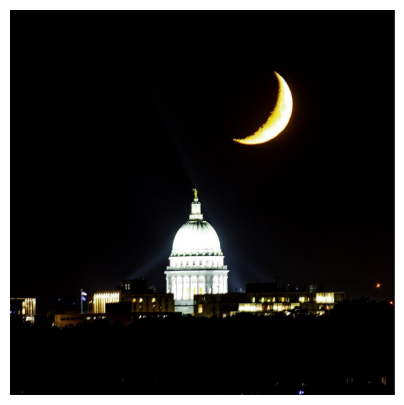

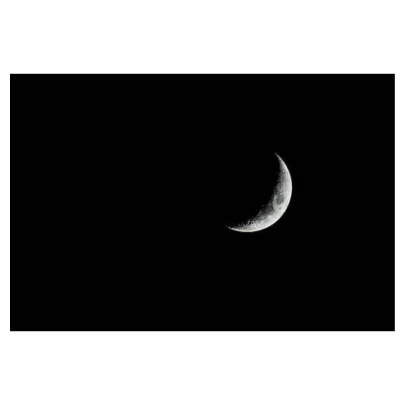

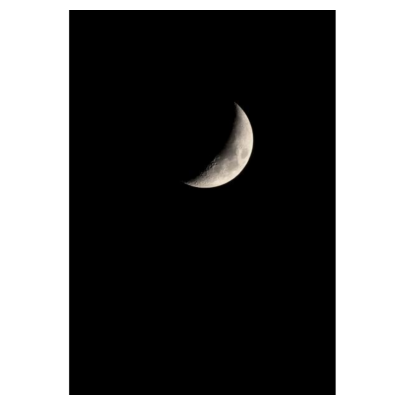

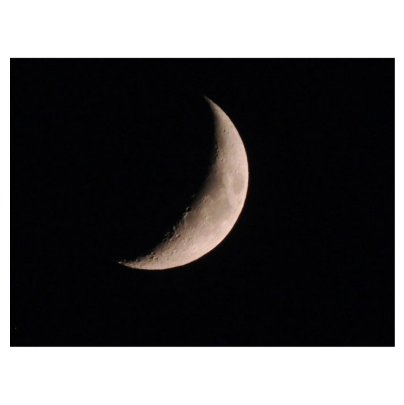

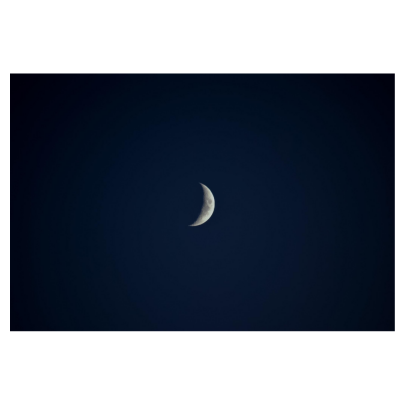

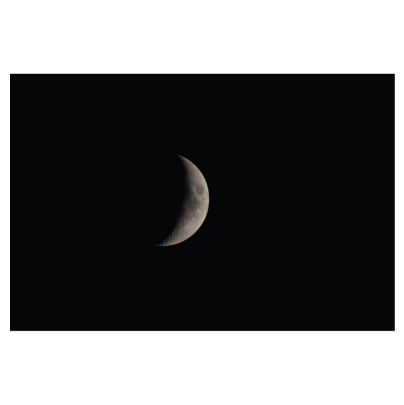

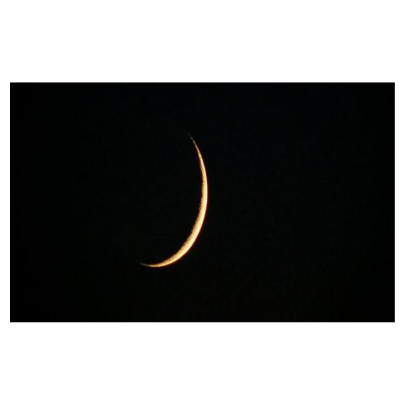

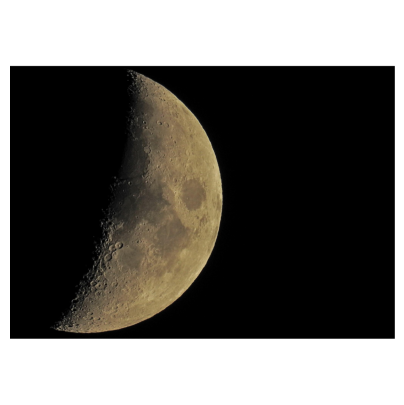

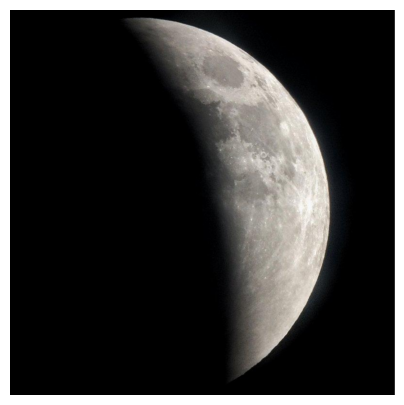

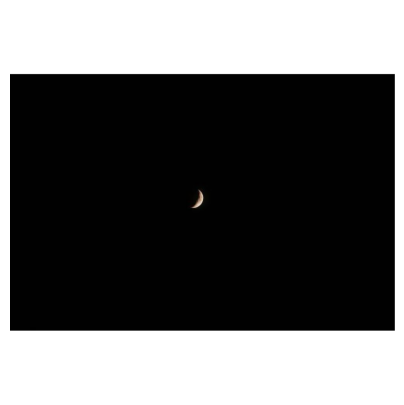

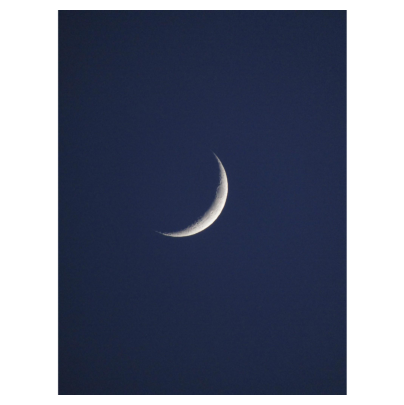

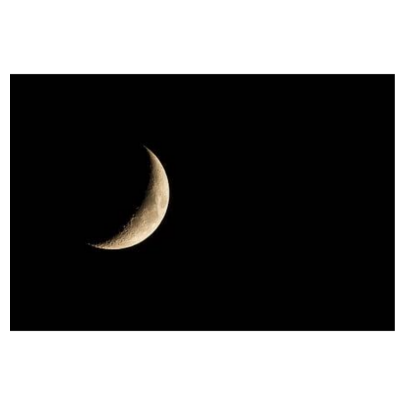

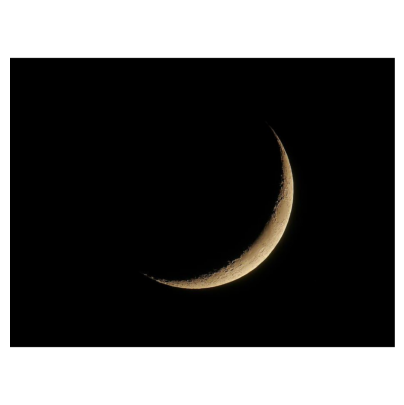

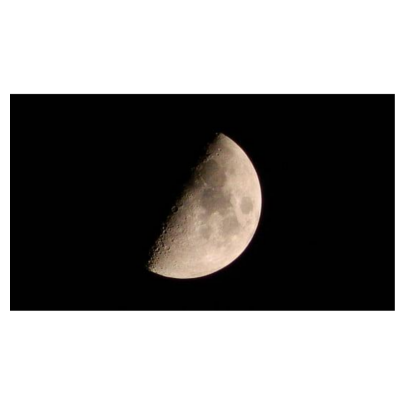

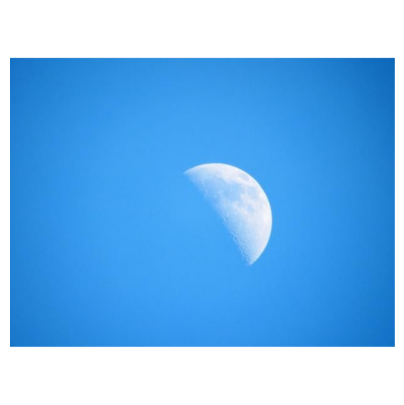

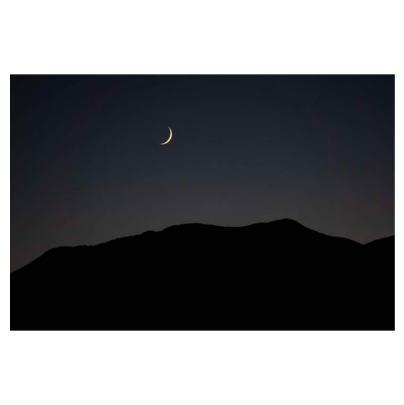

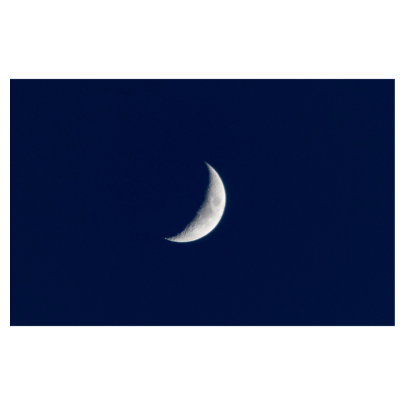

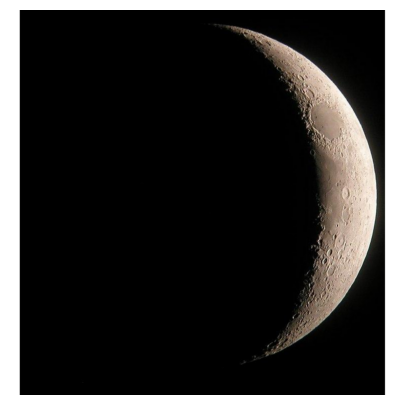

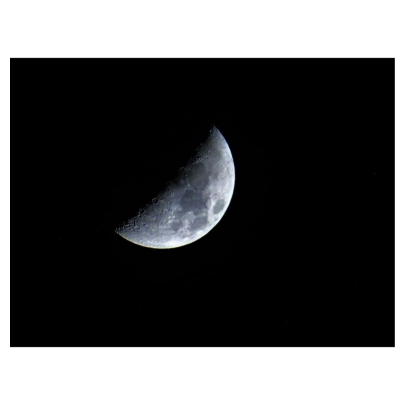

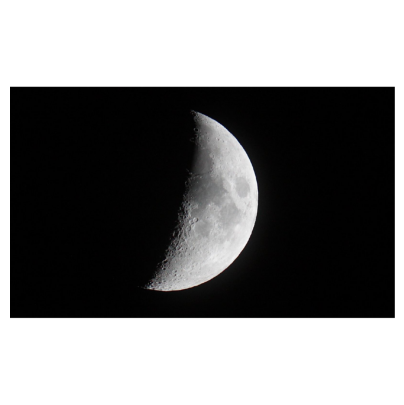

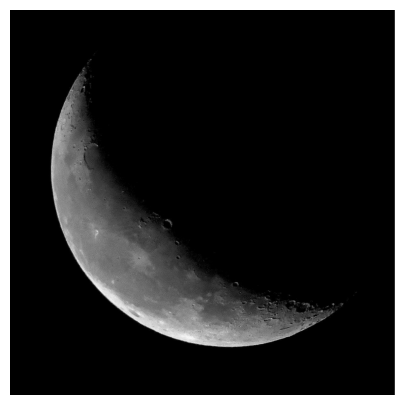

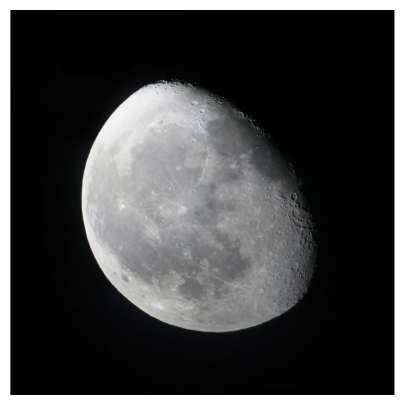

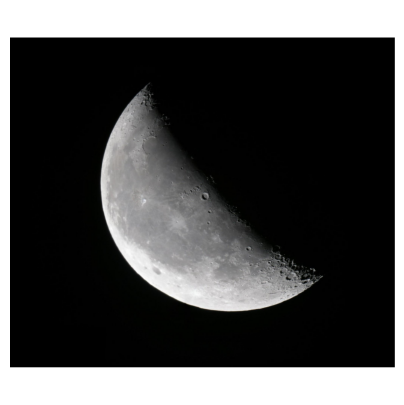

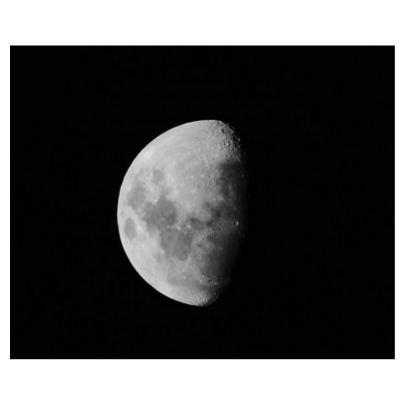

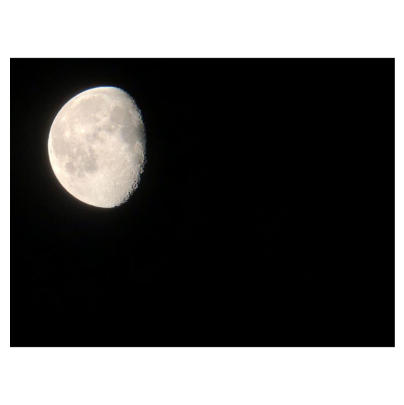

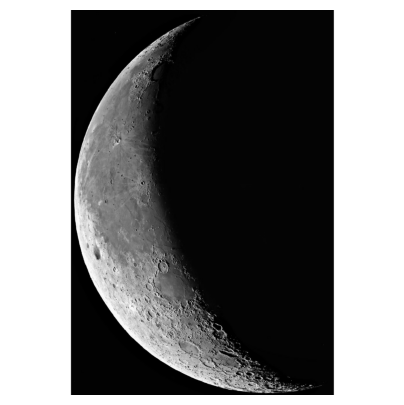

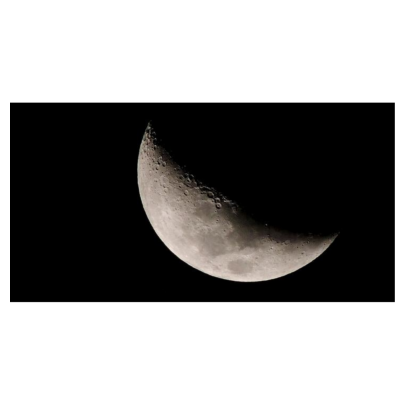

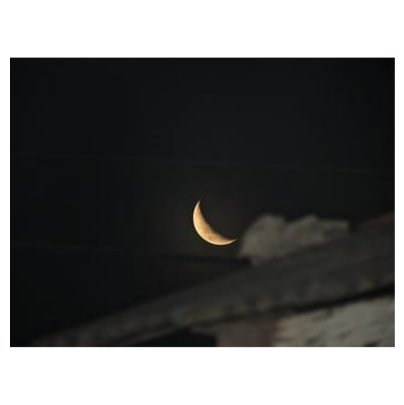

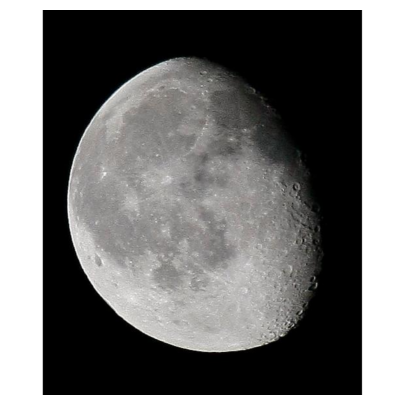

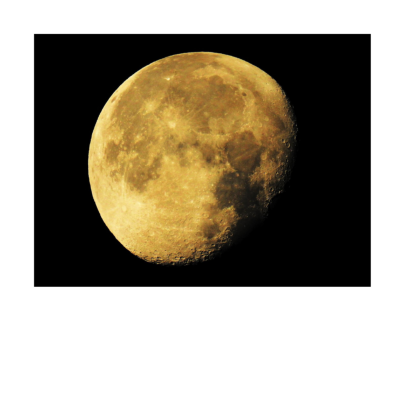

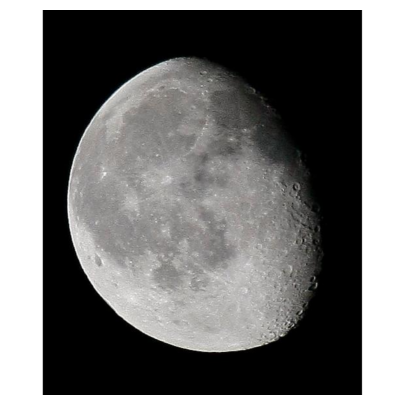

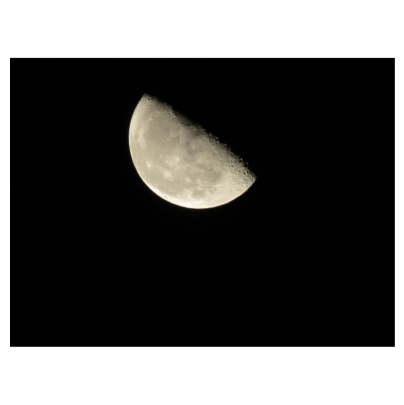

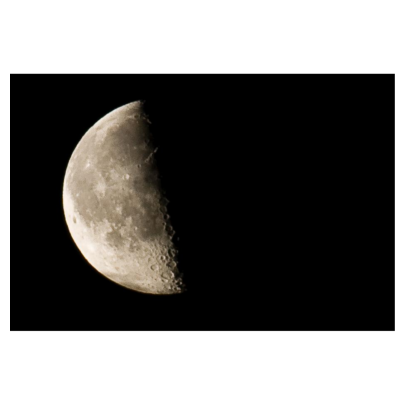

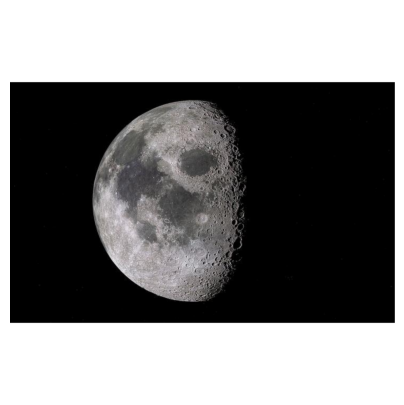

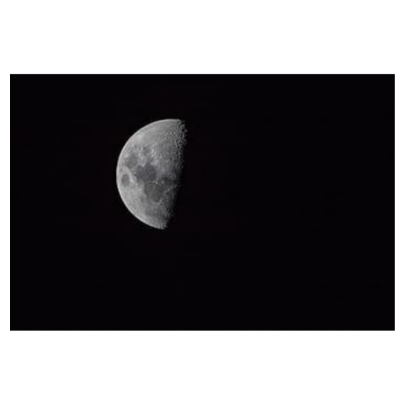

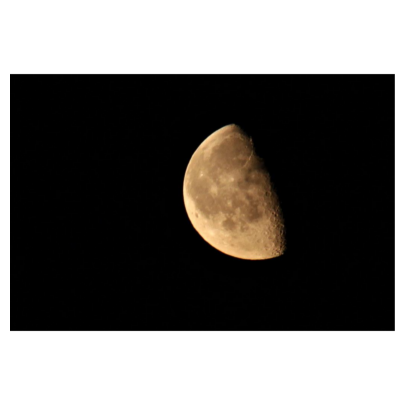

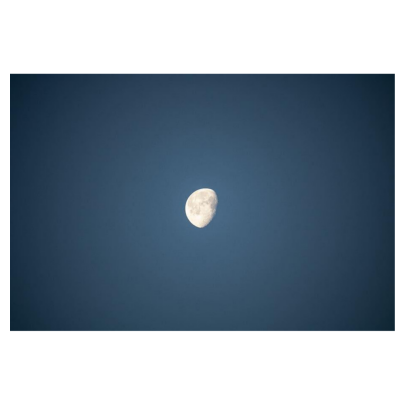

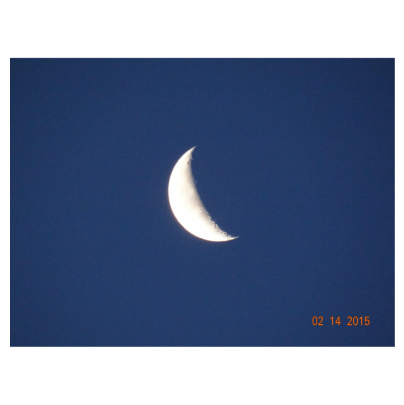

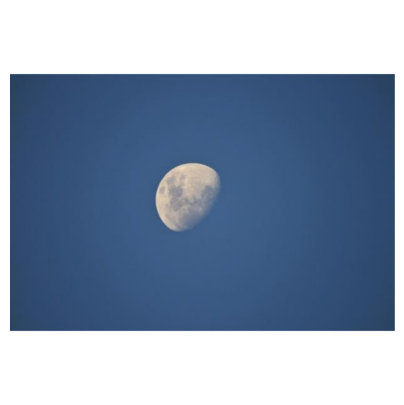

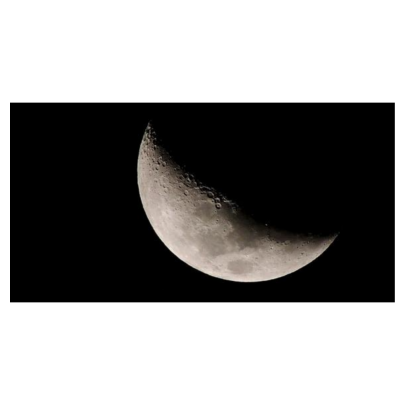

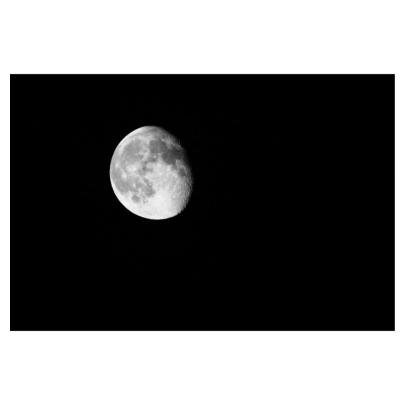

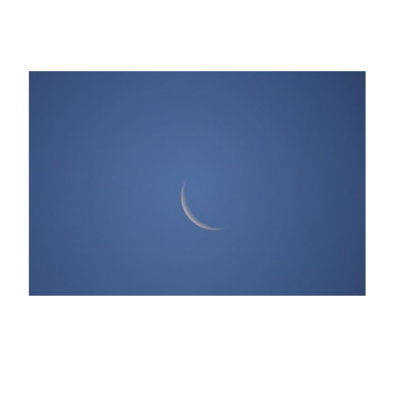

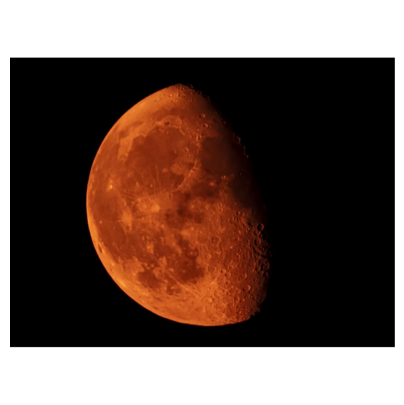

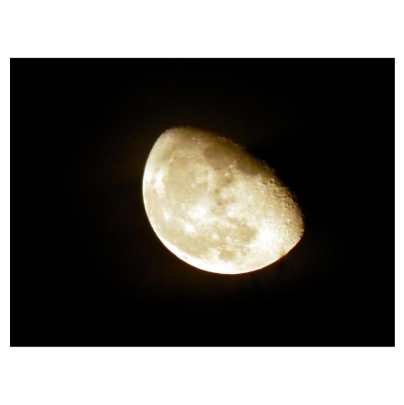

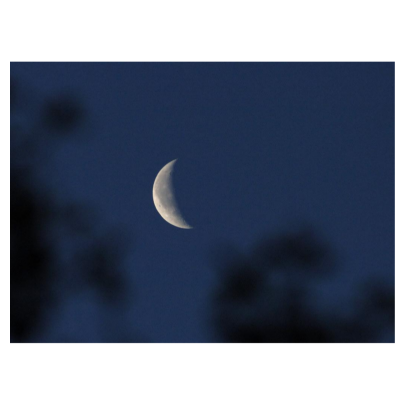

In [91]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
# gets the dimensions for the 'images' array along with the color channels

In [92]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
# passing a batch of images through a pre-trained for prediction or inference

In [93]:
model(images)

tensor([[ 0.1857,  0.3553,  6.9922,  ...,  3.4517,  1.4803,  9.3823],
        [-0.3218,  1.1765,  4.4884,  ...,  5.9954,  2.5057,  7.4899],
        [-0.2254,  1.0455,  4.6386,  ...,  5.0776,  2.8779,  5.9254],
        ...,
        [-1.1696,  3.2727, -4.9598,  ...,  7.3302,  2.8243,  2.6782],
        [ 0.6294,  0.7231, -1.5968,  ...,  3.5227,  1.6104,  4.3454],
        [-1.0943, -0.8180,  2.5997,  ..., -0.7001, -0.6031,  3.1779]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
# setting the result from above equal to a variable

In [94]:
y = model(images)

In [ ]:
# obtaining the dimensions for the variable above

In [95]:
y.shape

torch.Size([50, 1000])

In [ ]:
# finding the index of the maximum value along each row of the tensor 'y', moving it to the CPU if it's not
# already there, and then converting it into a NumPy array

In [96]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
# iterates through each element of the list 'guesses', assumes each element is an index, and then prints the corresponding element from the list 'labels'

In [97]:
for i in list(guesses):
    print(labels[i])

nematode, nematode worm, roundworm
nematode, nematode worm, roundworm
nematode, nematode worm, roundworm
bubble
puck, hockey puck
space shuttle
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
abaya
nematode, nematode worm, roundworm
notebook, notebook computer
cleaver, meat cleaver, chopper
mailbag, postbag
mortar
pick, plectrum, plectron
cleaver, meat cleaver, chopper
binder, ring-binder
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
nematode, nematode worm, roundworm
cleaver, meat cleaver, chopper
jellyfish
cleaver, meat cleaver, chopper
cleaver, meat cleaver, chopper
nematode, nematode worm, roundworm
nematode, nematode worm, roundworm
cleaver, meat cleaver, chopper
nematode, nematode worm, roundworm
jellyfish
nematode, nematode worm, roundworm
spotlight, spot
golf ball
nematode, nematode worm, roundworm
spatula
cleaver, meat cleaver, chopper
pick, plectrum, plectron
gong, tam-tam
pick, plectrum, plectron
cleaver, meat cleaver, chopper


In [ ]:
# making an array with the first 25 elements as 0 and the remaining 25 elements as 1

In [98]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
# displaying the 'Y' array

In [99]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# converts a PyTorch tensor 'y' into a NumPy array 'X', after detaching it from the computation graph and moving it to the CPU

In [100]:
X = y.detach().cpu().numpy()

In [ ]:
# checking the dimensions of the 'X' array

In [101]:
X.shape

(50, 1000)

In [ ]:
# creates a plot with dots representing the values in the first element of the array 'X'

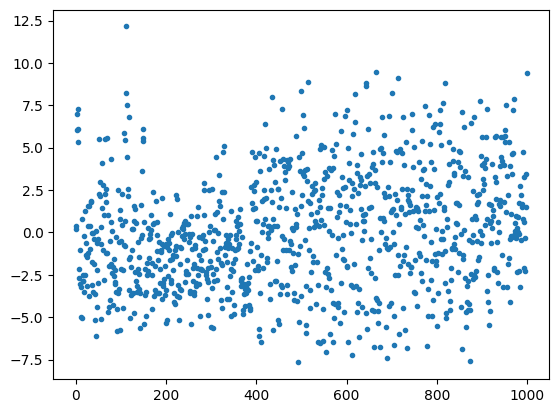

In [102]:
plt.plot(X[0],'.')

In [ ]:
# showcases the values in the first element of array 'X'

In [103]:
X[0]

array([ 1.8569672e-01,  3.5531503e-01,  6.9921689e+00,  6.0688663e+00,
        6.0769224e+00,  7.2999887e+00,  5.3377233e+00, -2.6624985e+00,
       -2.1803007e+00, -1.0495548e+00, -3.0612166e+00, -3.2094469e+00,
       -5.0013518e+00,  7.9789758e-01, -5.0366974e+00, -2.8765225e+00,
       -2.4982145e+00, -2.8354719e+00, -1.9925153e-01, -3.4929404e+00,
        1.2852188e+00, -2.5272844e+00, -1.3029137e+00, -5.9790760e-01,
       -3.1632090e+00, -1.4627653e+00, -1.2397449e+00,  4.0870327e-01,
        1.5663943e+00,  1.5303193e+00, -3.7769470e+00,  3.6485556e-01,
       -1.0033889e+00,  1.8165498e+00,  1.8327849e+00, -1.7704585e+00,
       -3.5202801e-02, -3.0817840e+00, -5.7823494e-02, -3.4996142e+00,
       -3.7672713e-01, -1.8614786e+00, -5.1738300e+00, -3.6429036e+00,
        1.0980654e-01, -6.1039009e+00, -6.0620427e-01, -2.2163386e+00,
       -4.4232869e+00, -2.9700325e+00, -4.1162556e-01,  2.2573116e+00,
        5.5308485e+00,  2.9584956e+00,  2.1455102e+00,  3.1544095e-01,
      

In [ ]:
# finds the index of the maximum value in the first row of array 'X'

In [104]:
np.argmax(X[0])

111

In [ ]:
# accessing the element at index 948 in the list or array named 'labels'

In [105]:
labels[948]

'Granny Smith'

In [ ]:
# sorts the elements of the first row (index 0) of the array 'X' in descending order and then selects the indices of the top 10 elements

In [106]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
# iterating over the elements of the list 'top_ten' and printing out the corresponding elements from the 'labels' list

In [107]:
for i in top_ten:
    print(labels[i])

nematode, nematode worm, roundworm
mortar
toilet tissue, toilet paper, bathroom tissue
pick, plectrum, plectron
cowboy hat, ten-gallon hat
spotlight, spot
matchstick
mask
cleaver, meat cleaver, chopper
conch


In [ ]:
# the full 'labels' list

In [108]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [ ]:
# generates a histogram plot of the values in the first row (index 0) of array or list 'X'

(array([ 28., 101., 211., 215., 195., 127.,  79.,  33.,  10.,   1.]),
 array([-7.67021942, -5.68838406, -3.70654869, -1.72471333,  0.25712204,
         2.23895741,  4.22079277,  6.20262814,  8.1844635 , 10.16629887,
        12.14813423]),
 <BarContainer object of 10 artists>)

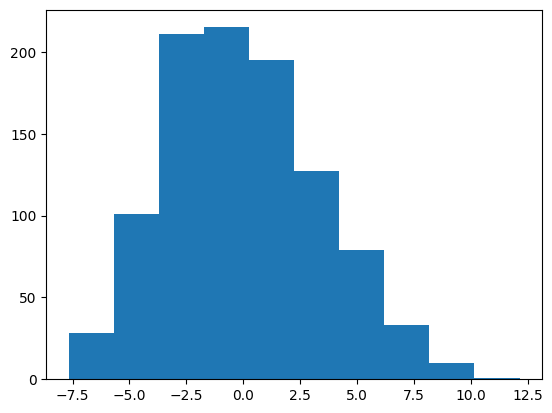

In [109]:
plt.hist(X[0])

In [ ]:
# reequaling the variables 'X' and 'Y' to be the result of a function with 'X' and 'Y' as inputs

In [110]:
X = GPU_data(X)
Y = GPU_data(Y)

1.   'torch.exp(x - torch.max(x, 1)[0][:, None])': This calculates the exponential of each element in the input tensor 'x', subtracting the maximum value of each row to prevent numerical instability (overflow) when exponentiating large numbers. It finds the maximum value along each row ('torch.max(x, 1)[0]'), subtracts it from each element in the corresponding row, and reshapes the result to a column vector ('[:, None]').
2.   's1 / s1.sum(1)[:, None]': This normalizes the exponential values obtained in the previous step by dividing each element by the sum of the corresponding row. 's1.sum(1)' calculates the sum along each row, and '[:, None]' reshapes it to a column vector. Then, element-wise division is performed.
1.   The function returns the resulting tensor 's', which represents the softmax activations of the input tensor 'x'.






In [ ]:
# computes the softmax activation function for a given input tensor

In [111]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

1.   'softmax(outputs)': This applies the softmax function to the 'outputs', which are typically the raw scores or logits produced by a neural network. Softmax converts these scores into probabilities.
2.   '.log()': After applying softmax, this takes the natural logarithm of each probability. This is part of the standard formula for cross-entropy loss.
1.   '[range(outputs.size()[0]), labels.long()]': This part constructs indices to select the log probabilities corresponding to the correct classes. 'range(outputs.size()[0])' creates a range of numbers from 0 to 'outputs.size()[0] - 1', which is typically the batch size. 'labels.long()' converts the labels into a long tensor (integers) if they're not already
1.   'torch.sum()': This function sums up the log probabilities selected by the indices calculated earlier.
2.   '-torch.sum(...)': This negates the sum, as cross-entropy is typically minimized, but we want to maximize the likelihood.
2.   '/outputs.size()[0]': Finally, we divide the negative sum by the batch size to get the average cross-entropy loss per sample in the batch.




In [ ]:
# calculates the cross-entropy loss between the predicted outputs and the true labels

In [112]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

1.   'torch.rand(size)': This generates a tensor of random numbers from a uniform distribution between 0 and 1 with the specified size.
2.   '*(1-np.exp(-2)) + np.exp(-2)': This adjusts the range of the random numbers to be between 'np.exp(-2)' and 1.
1.   'u2 = torch.rand(size)': This generates another set of random numbers for the second dimension.
2.   'z = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)': This line generates the samples from a truncated normal distribution. It first calculates 'z' as the square root of '-2 * log(u1)', where 'u1' is a random number from a uniform distribution. Then it multiplies this by 'cos(2*pi*u2)', where 'u2' is another set of random numbers from a uniform distribution. This ensures the samples are distributed according to a normal distribution.
1.   'return z': Finally, the function returns the generated samples.





In [ ]:
# generates samples from a truncated normal distribution

In [113]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

1.   'torch.no_grad()': This is a context manager provided by PyTorch which disables gradient calculation. It's used here to speed up computation since we're not interested in gradient calculation for the accuracy calculation.
2.   'torch.sum(torch.max(out, 1)[1] == y)': This line calculates the number of correct predictions. Let's break it down:
*   'torch.max(out, 1)' returns a tuple containing the maximum value along dimension 1 (which corresponds to the predicted class) and the indices of the maximum values.
*   'torch.max(out, 1)[1]' extracts the indices of the maximum values, which correspond to the predicted classes.
*   'torch.max(out, 1)[1] == y' creates a boolean tensor indicating where the predicted class matches the true class.
*   'torch.sum(...)' sums up the number of correct predictions.
3.  '.item()': Converts the sum of correct predictions to a Python number.
1.  Finally, the sum of correct predictions is divided by the total number of samples 'y.shape[0]' to get the accuracy.








In [ ]:
# compares the predicted labels 'out' with the actual labels 'y' and returns the accuracy.

In [114]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
# gets the dimensions of array 'X'

In [115]:
X.shape

torch.Size([50, 1000])

1.   It takes a single argument 'mode' which specifies whether to generate batches for training or testing.
2.   It accesses a variable 'c.b' to determine the batch size.
1.   If 'mode' is "train", it randomly selects a starting index 'r' within the range of the training data 'X'. Then it selects a batch of input data 'x' and corresponding output data 'y' from the training data.
2.   If 'mode' is "test", it does the same as above but for the test data 'X_test' and 'Y_test'.
2.   It returns the batch of input data 'x' and corresponding output data 'y'.







In [ ]:
# generates batches of data for either training or testing purposes

In [116]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

*   'def model(x, w):': This line defines a function named model that takes two parameters: 'x' and 'w'.
*   'return x@w[0]': This line returns the result of multiplying 'x' by the first element of the array 'w' using the matrix multiplication operator '@'.




In [ ]:
# takes an array 'x' and an array 'w', and it returns the result of the matrix multiplication of 'x' with the first element of 'w'

In [117]:
def model(x,w):

    return x@w[0]

1.  'def make_plots():' - This defines a function named 'make_plots'.
2.  'acc_train = acc(model(x,w),y)' - This line calculates the training accuracy of the model. It seems like 'model' is a function that takes input data 'x' and weights 'w', and produces predictions. The function 'acc' then calculates the accuracy of these predictions compared to the actual labels 'y'.
1.   'wb.log({"acc_train": acc_train})' - This line logs the training accuracy to Weights & Biases. 'wb.log' is used to log data to W&B, and '{"acc_train": acc_train}' creates a dictionary where the key is '"acc_train"' and the value is the calculated training accuracy 'acc_train'.





In [ ]:
# calculates the training accuracy of a model ('acc_train') and logs this accuracy using Weights & Biases (wandb)

In [118]:
def make_plots():

    acc_train = acc(model(x,w),y)

    wb.log({"acc_train": acc_train})

'wb.init(project="Linear_Model_Photo_1")': Initializes the Weights & Biases (wandb) project named "Linear_Model_Photo_1". Weights & Biases is a tool for tracking experiments and visualizing results.

'c = wb.config: Retrieves the configuration settings for the experiment.
c.h = 0.001, c.b = 4, c.epochs = 100000': Sets the learning rate ('h'), batch size ('b'), and number of epochs ('epochs') using the configurations obtained from 'wb.config'.

'w = [GPU(Truncated_Normal((1000,2)))]': Initializes the weights (w) of the linear model using a truncated normal distribution with mean 0 and standard deviation 1. The shape of the weight matrix is (1000, 2). This means there are 1000 features and 2 output classes.

'optimizer = torch.optim.Adam(w, lr=c.h)': Initializes the Adam optimizer with the specified learning rate 'c.h' for updating the weights during training.

'for i in range(c.epochs):': Starts the loop for training the model for 'c.epochs' number of iterations.

'x,y = get_batch('train')': Obtains a batch of training data ('x') and its corresponding labels ('y') from the training dataset.

'loss = cross_entropy(softmax(model(x,w)),y)': Calculates the cross-entropy loss between the predicted probabilities (obtained by passing the input data 'x' through the model) and the actual labels 'y'.

'optimizer.zero_grad()': Clears the gradients of all optimized tensors.

'loss.backward()': Computes the gradients of the loss with respect to the model parameters.

'optimizer.step()': Updates the model parameters based on the computed gradients.

'wb.log({"loss": loss})': Logs the current loss value to the Weights & Biases project for tracking.

'make_plots()': Visualizes the training progress by creating plots, possibly showing the loss over time or other relevant metrics.

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 4
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: